# Import Stackup
This example shows how to import stackup file.

## Import the required packages

In [1]:
import json
from pathlib import Path
import tempfile

from IPython.display import display
from ansys.aedt.core.downloads import download_file
import pandas as pd

from pyedb import Edb

AEDT_VERSION = "2024.2"
NG_MODE = False


C:\Users\ansys\AppData\Local\Temp\ipykernel_5812\2431567430.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Download the example PCB data.

In [2]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")
file_edb = download_file(source="edb/ANSYS-HSD_V1.aedb", destination=temp_folder.name)

## Load example layout.

In [3]:
edbapp = Edb(file_edb, edbversion=AEDT_VERSION)

PyAEDT INFO: Logger is initialized in EDB.


PyAEDT INFO: legacy v0.37.0


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: Database ANSYS-HSD_V1.aedb Opened in 2024.2


PyAEDT INFO: Cell main Opened


PyAEDT INFO: Builder was initialized.


PyAEDT INFO: EDB initialized.


## Review original stackup definition

Get original stackup definition in a dictionary. Alternatively, stackup definition can be exported in a json file by
edbapp.configuration.export()

In [4]:
data_cfg = edbapp.configuration.get_data_from_db(stackup=True)

PyAEDT INFO: Getting data from layout database.


In [5]:
df = pd.DataFrame(data=data_cfg["stackup"]["layers"])
display(df)

name                     type    material  fill_material  \
0            1_Top                   signal      copper  Solder Resist   
1              DE1               dielectric    Megtron4                  
2     Inner1(GND1)                   signal      copper     Megtron4_2   
3              DE2               dielectric  Megtron4_2                  
4     Inner2(PWR1)                   signal      copper     Megtron4_2   
5              DE3               dielectric    Megtron4                  
6     Inner3(Sig1)                   signal      copper     Megtron4_3   
7     Megtron4-1mm               dielectric  Megtron4_3                  
8     Inner4(Sig2)                   signal      copper     Megtron4_3   
9              DE5               dielectric    Megtron4                  
10    Inner5(PWR2)                   signal      copper     Megtron4_2   
11             DE6               dielectric  Megtron4_2                  
12    Inner6(GND2)                   signal      copper     Megtron4_2   
13             DE7               dielectric    Megtron4                  
14       16_Bottom                   signal      copper  Solder Resist   
15        Measures                  measure         NaN            NaN   
16  SIwave Regions  siwavehfsssolverregions         NaN            NaN   
17     Top Overlay               silkscreen         NaN            NaN   
18      Top Solder               soldermask         NaN            NaN   
19   Bottom Solder               soldermask         NaN            NaN   
20  Bottom Overlay               silkscreen         NaN            NaN   
21         Outline                  outline         NaN            NaN   
22            Rats                 airlines         NaN            NaN   
23          Errors                   errors         NaN            NaN   
24         Symbols                   symbol         NaN            NaN   
25  Postprocessing           postprocessing         NaN            NaN   

   thickness            color  \
0    0.035mm      [255, 0, 0]   
1      0.1mm  [128, 128, 128]   
2    0.017mm    [128, 128, 0]   
3    0.088mm  [128, 128, 128]   
4    0.017mm  [112, 219, 250]   
5      0.1mm  [128, 128, 128]   
6    0.017mm    [255, 0, 255]   
7        1mm  [128, 128, 128]   
8    0.017mm    [128, 0, 128]   
9      0.1mm  [128, 128, 128]   
10   0.017mm    [0, 204, 102]   
11   0.088mm  [128, 128, 128]   
12   0.017mm    [0, 128, 128]   
13     0.1mm  [128, 128, 128]   
14   0.035mm      [0, 0, 255]   
15       NaN     [63, 63, 63]   
16       NaN  [127, 127, 127]   
17       NaN  [208, 145, 239]   
18       NaN   [16, 115, 138]   
19       NaN    [46, 67, 160]   
20       NaN  [219, 116, 240]   
21       NaN        [0, 0, 0]   
22       NaN      [0, 0, 255]   
23       NaN      [255, 0, 0]   
24       NaN    [127, 0, 127]   
25       NaN   [40, 152, 137]   

                                              etching  \
0   {'factor': '0', 'enabled': False, 'etch_power_...   
1   {'factor': '0', 'enabled': False, 'etch_power_...   
2   {'factor': '0', 'enabled': False, 'etch_power_...   
3   {'factor': '0', 'enabled': False, 'etch_power_...   
4   {'factor': '0', 'enabled': False, 'etch_power_...   
5   {'factor': '0', 'enabled': False, 'etch_power_...   
6   {'factor': '0', 'enabled': False, 'etch_power_...   
7   {'factor': '0', 'enabled': False, 'etch_power_...   
8   {'factor': '0', 'enabled': False, 'etch_power_...   
9   {'factor': '0', 'enabled': False, 'etch_power_...   
10  {'factor': '0', 'enabled': False, 'etch_power_...   
11  {'factor': '0', 'enabled': False, 'etch_power_...   
12  {'factor': '0', 'enabled': False, 'etch_power_...   
13  {'factor': '0', 'enabled': False, 'etch_power_...   
14  {'factor': '0', 'enabled': False, 'etch_power_...   
15                                                NaN   
16                                                NaN   
17                                                NaN   
18                                      

## Modify stackup

Modify top layer thickness

In [6]:
data_cfg["stackup"]["layers"][0]["thickness"] = 0.00005

Add a solder mask layer

In [7]:
data_cfg["stackup"]["layers"].insert(
    0, {"name": "soler_mask", "type": "dielectric", "material": "Megtron4", "fill_material": "", "thickness": 0.00002}
)

Review modified stackup

In [8]:
df = pd.DataFrame(data=data_cfg["stackup"]["layers"])
display(df.head(3))

name        type  material  fill_material thickness            color  \
0  soler_mask  dielectric  Megtron4                  0.00002              NaN   
1       1_Top      signal    copper  Solder Resist   0.00005      [255, 0, 0]   
2         DE1  dielectric  Megtron4                    0.1mm  [128, 128, 128]   

                                             etching  \
0                                                NaN   
1  {'factor': '0', 'enabled': False, 'etch_power_...   
2  {'factor': '0', 'enabled': False, 'etch_power_...   

                                           roughness  
0                                                NaN  
1  {'top': {'model': 'huray', 'nodule_radius': '0...  
2  {'top': {'model': 'huray', 'nodule_radius': '0...

Write stackup definition into a json file

In [9]:
file_cfg = Path(temp_folder.name) / "edb_configuration.json"
with open(file_cfg, "w") as f:
    json.dump(data_cfg, f, indent=4, ensure_ascii=False)

## Load stackup from json configuration file

In [10]:
edbapp.configuration.load(file_cfg, apply_file=True)

Plot stackup

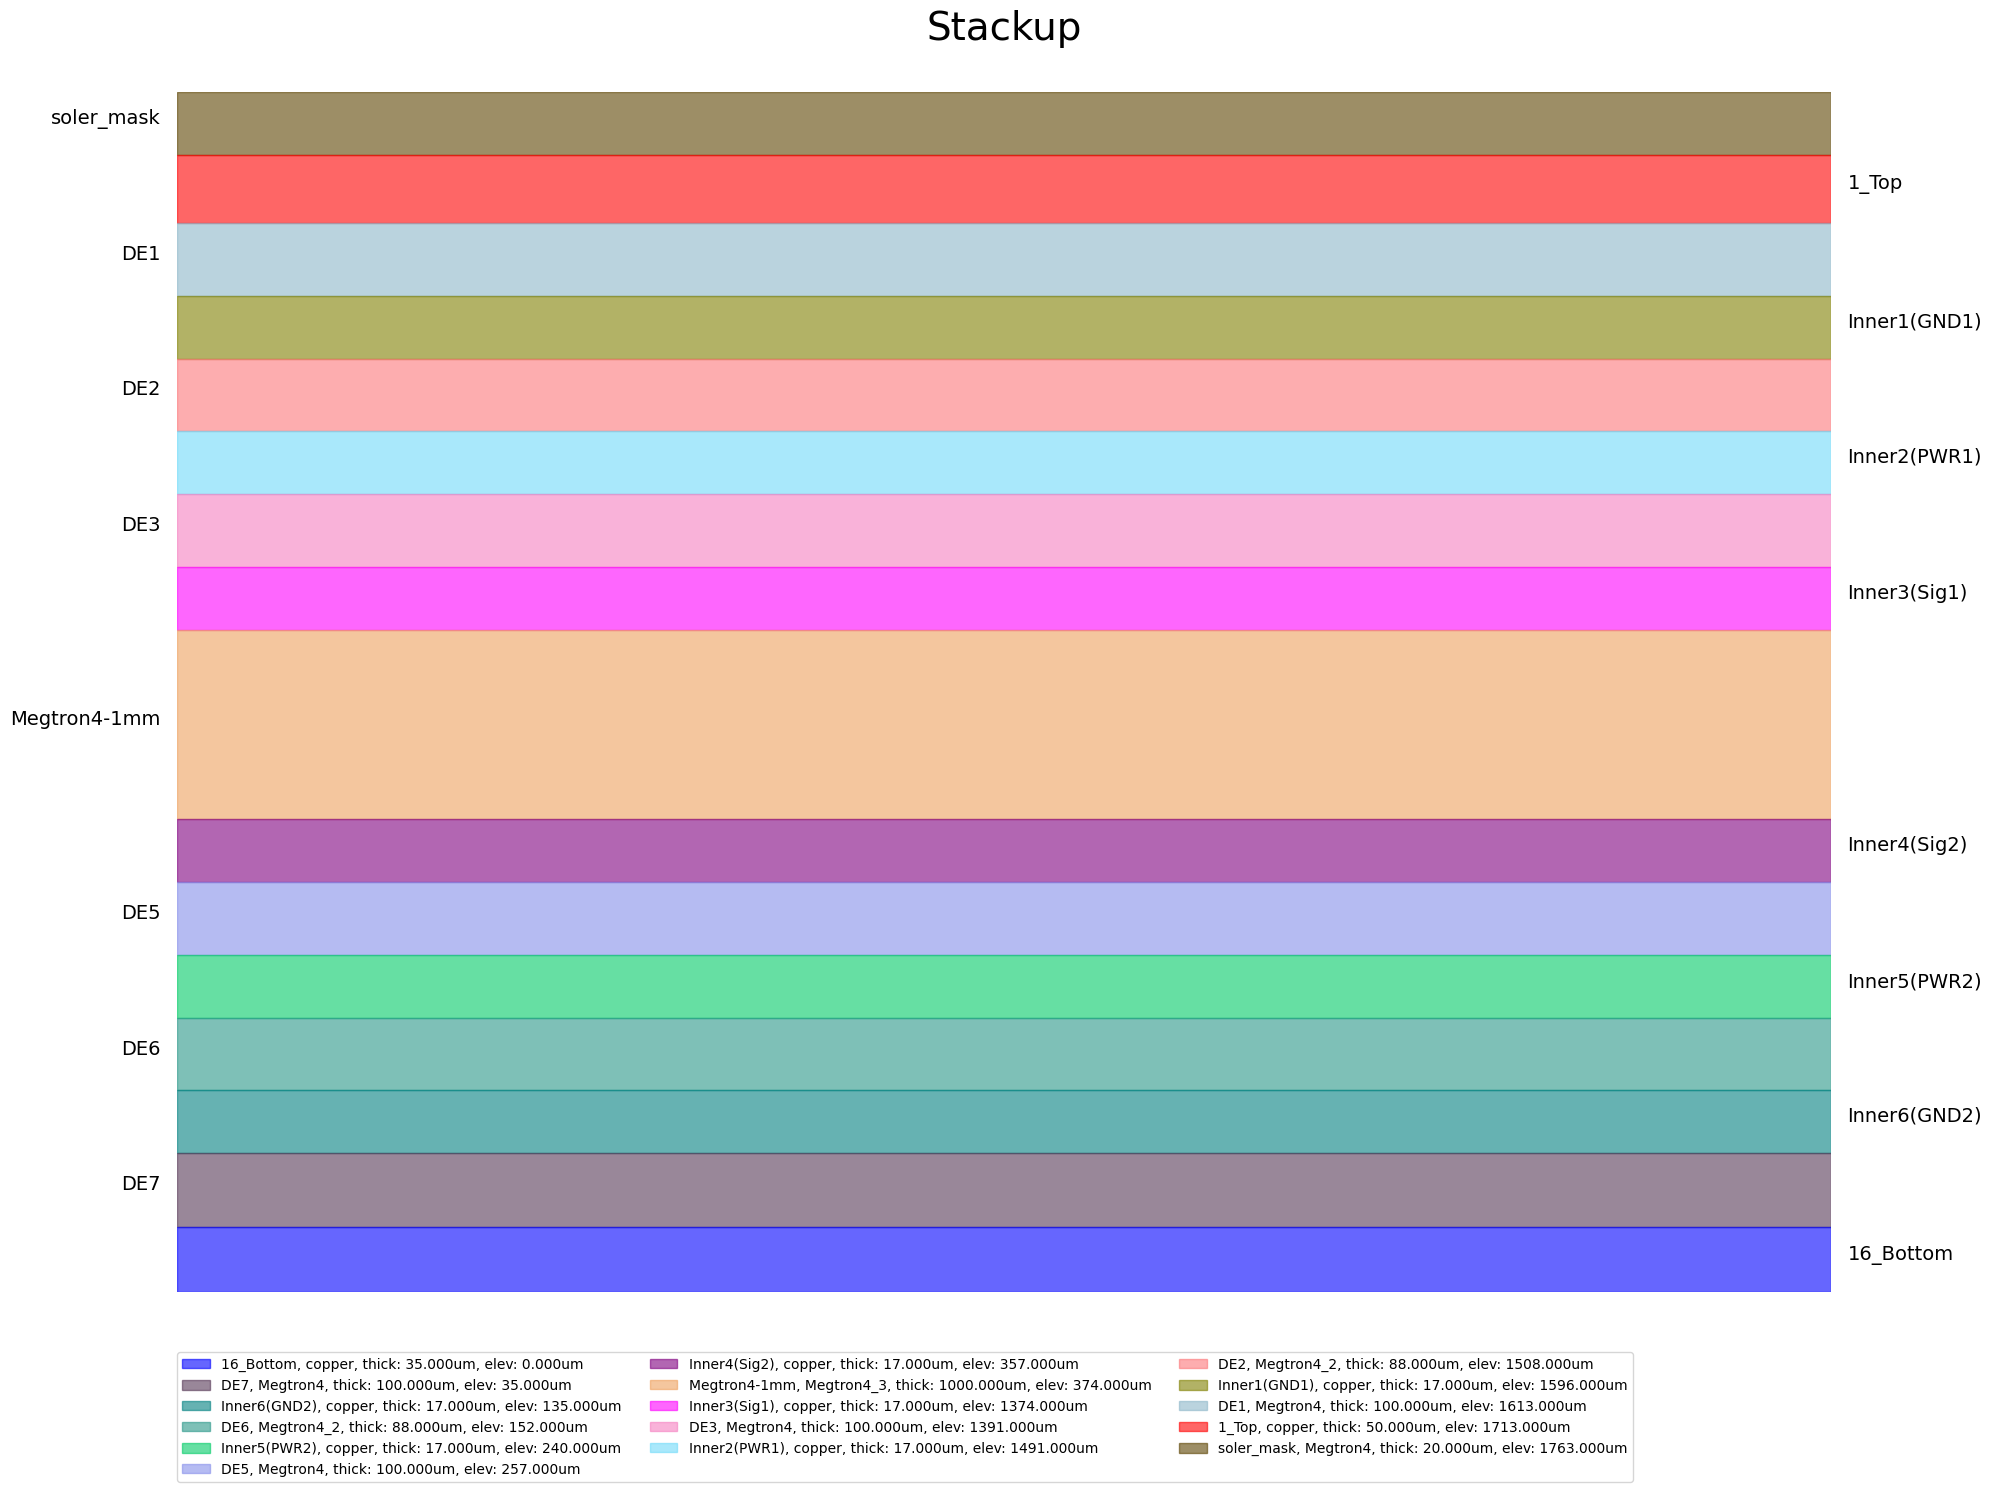

<module 'matplotlib.pyplot' from 'C:\\actions-runner\\_work\\pyaedt-examples\\pyaedt-examples\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [11]:
edbapp.stackup.plot()

Check top layer thickness

In [12]:
edbapp.stackup["1_Top"].thickness

5e-05

## Save and close Edb
The temporary folder will be deleted once the execution of this script is finished. Replace **edbapp.save()** with
**edbapp.save_as("C:/example.aedb")** to keep the example project.

In [13]:
edbapp.save()
edbapp.close()

True